<a href="https://colab.research.google.com/github/ilafila/Intelligent-Systems/blob/main/Pandas%26DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
data = pd.read_csv(url, sep='\t')
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
# 1. Вывести: кол-во наблюдений в датасете
print(len(data))

4622


In [4]:
# 2. Вывести названия столбцов
data.columns.tolist()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [5]:
# 3. Определить самую частую позицию (item) в заказе
data['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

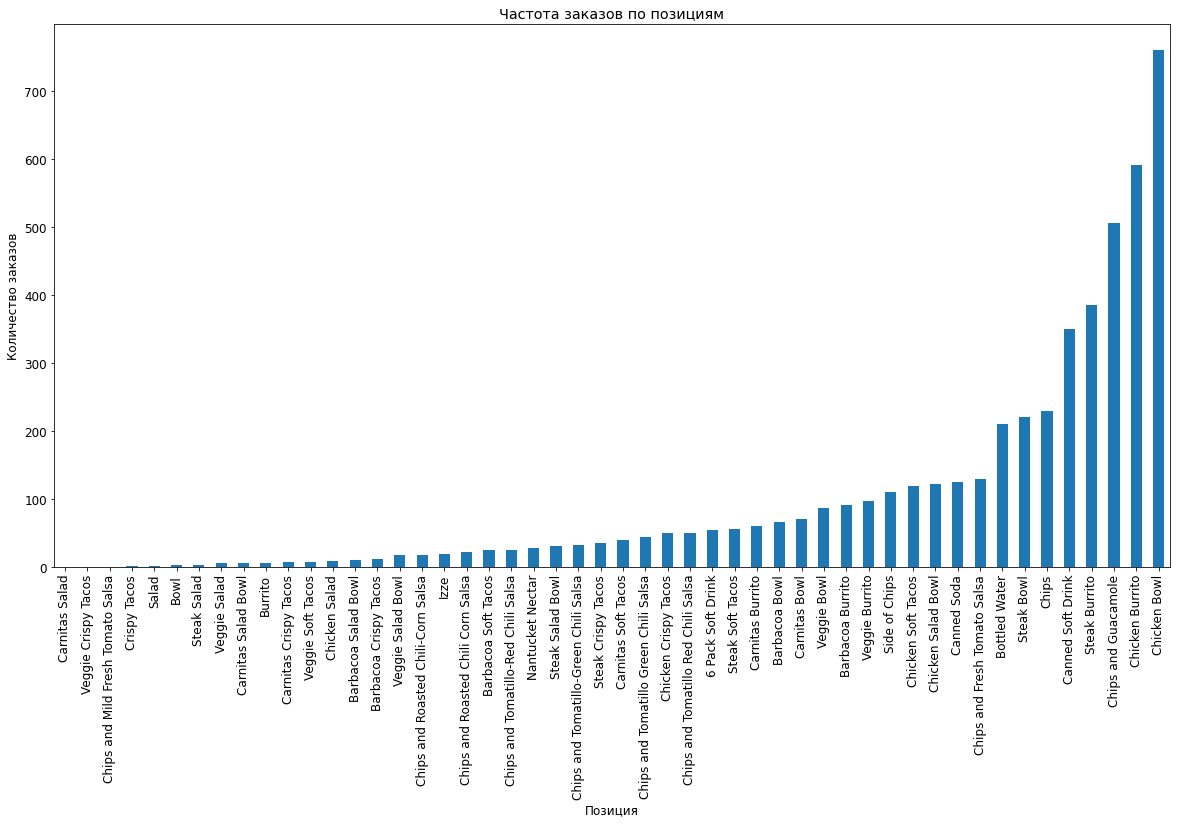

In [6]:
# 4. Построить гистрограмму частоты заказов по позициям (item)
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12
data.groupby('item_name')['quantity'].sum().sort_values().plot(kind='bar')
plt.title('Частота заказов по позициям')
plt.ylabel('Количество заказов')
plt.xlabel('Позиция')
plt.show()

In [7]:
# 5. Измените тип переменной item_price c с помощью лямбды функции
if data['item_price'].dtype != 'float64':
    data['item_price'] = data['item_price'].apply(lambda x: float(x[1:]))
print(data['item_price'].dtype)

float64


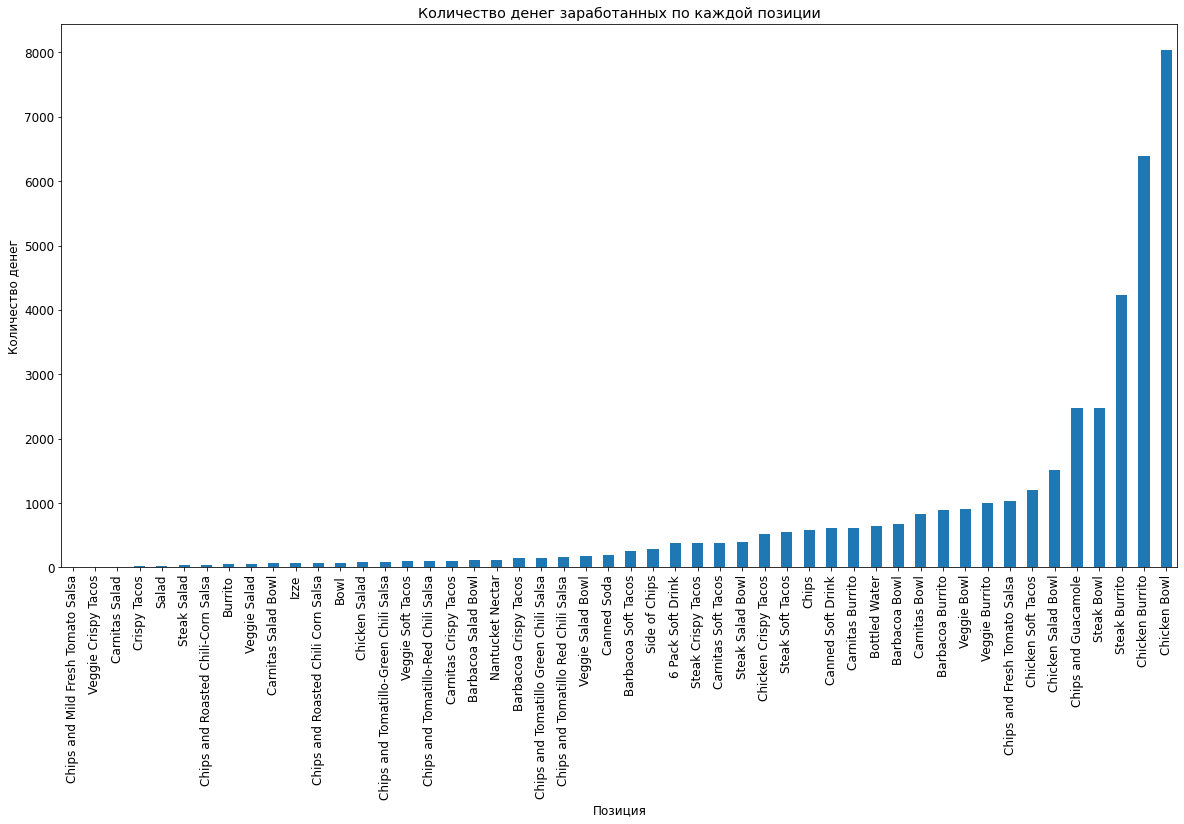

In [8]:
# 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
price = pd.to_numeric(data['item_price'])
quantity = pd.to_numeric(data['quantity'])
data['sum_price'] = quantity * price
data.groupby('item_name')['sum_price'].sum().sort_values().plot(kind='bar')
plt.xlabel('Позиция')
plt.ylabel('Количество денег')
plt.title('Количество денег заработанных по каждой позиции')
plt.show()

In [9]:
# 7. Средняя сумма заказа? (минимум 2 способа)
print('Первый способ:', data['item_price'].sum() / len(data.groupby('order_id')))
total_order_sum = data['item_price'].sum()
num_orders = len(set(data['order_id']))
average_order_price = total_order_sum / num_orders
print('Второй способ:', average_order_price)

Первый способ: 18.811428571428575
Второй способ: 18.811428571428575


In [10]:
# 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
group = data.groupby('order_id').item_name.nunique().reset_index()
group.agg({
    'item_name': ['mean', 'min', 'max', 'median'],
})

,item_name
mean,2.34024
min,1.00000
max,8.00000
median,2.00000


In [11]:
# 9.1 Определить статистику заказов стейков
steaks_stat = data[data.item_name.str.contains("Steak")]
steaks_stat[["quantity", "item_price"]].describe()


,quantity,item_price
count,702.000000,702.000000
mean,1.045584,10.518889
std,0.228314,2.566743
min,1.000000,8.690000
25%,1.000000,8.990000
50%,1.000000,9.250000
75%,1.000000,11.750000
max,3.000000,27.750000


In [12]:
# 9.2 Определить статистику заказов прожарки.
roast_stat = data[data.choice_description.str.contains("Mild|Medium|Hot", na=False)]
roast_stat[["quantity", "item_price"]].describe()

,quantity,item_price
count,783.000000,783.000000
mean,1.054917,9.772031
std,0.238920,2.588239
min,1.000000,8.190000
25%,1.000000,8.490000
50%,1.000000,8.990000
75%,1.000000,10.980000
max,3.000000,32.940000


In [13]:
# 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
data['item_price_rub'] = data['item_price'].apply(lambda value: str(round(value * 75, 2)))
data.head()

,order_id,quantity,item_name,choice_description,item_price,sum_price,item_price_rub
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,179.25
1,1,1,Izze,[Clementine],3.39,3.39,254.25
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,254.25
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,179.25
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96,1273.5


In [14]:
# 11.1 Сгруппировать заказы по входящим позициям в него
group_orders = data.groupby('order_id').agg({'item_name': lambda data: ", ".join(data), 'item_price':np.sum,'quantity':np.sum}).reset_index()
group_orders

,order_id,item_name,item_price,quantity
0,1,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,4
1,2,Chicken Bowl,16.98,2
2,3,"Chicken Bowl, Side of Chips",12.67,2
3,4,"Steak Burrito, Steak Soft Tacos",21.00,2
4,5,"Steak Burrito, Chips and Guacamole",13.70,2
...,...,...,...,...
1829,1830,"Steak Burrito, Veggie Burrito",23.00,2
1830,1831,"Carnitas Bowl, Chips, Bottled Water",12.90,3
1831,1832,"Chicken Soft Tacos, Chips and Guacamole",13.20,2
1832,1833,"Steak Burrito, Steak Burrito",23.50,2


In [15]:
# 11.2 Отдельно сгруппировать по стейкам во всех видах прожарках
group_steaks = data.loc[data['item_name'].str.contains('Steak')]
group_steaks.groupby('order_id').agg({'quantity':np.sum, 'item_name': lambda x: ", ".join(x), 'item_price':np.sum})
group_steaks

,order_id,quantity,item_name,choice_description,item_price,sum_price,item_price_rub
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75,881.25
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25,693.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25,693.75
31,16,1,Steak Burrito,"[[Roasted Chili Corn Salsa (Medium), Fresh Tom...",8.99,8.99,674.25
43,20,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",11.75,11.75,881.25
...,...,...,...,...,...,...,...
4572,1818,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",9.39,9.39,704.25
4607,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",11.75,11.75,881.25
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75,881.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75,881.25


In [16]:
# 12. Определить цену по каждой позиции в отдельности
data.item_price = round(data.item_price / data.quantity, 2)
prices = data.groupby('item_name').agg({"item_price": lambda x: list(x.unique())})
prices

,item_price
item_name,
6 Pack Soft Drink,[6.49]
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,[7.4]
Burrito,[7.4]


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.